In [16]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

df = pd.read_csv('data/polished3_with_gdp.csv')

male = df[df["Sex"] == "M"]
female = df[df["Sex"] == "F"]

used_columns = ["Height", "BMI", "Age", "GDP"]

bio_by_sport_male = male.groupby(['Event'])[used_columns].median().reset_index()
bio_by_sport_female = female.groupby(['Event'])[used_columns].median().reset_index()

In [17]:
missing_values = bio_by_sport_female.info()  # or df.isna()
print(missing_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Event   169 non-null    object 
 1   Height  169 non-null    float64
 2   BMI     169 non-null    float64
 3   Age     169 non-null    float64
 4   GDP     169 non-null    float64
dtypes: float64(4), object(1)
memory usage: 6.7+ KB
None


In [18]:
from sklearn.preprocessing import StandardScaler

columns_to_normalize = used_columns

scaler = StandardScaler()

means_male = bio_by_sport_male[columns_to_normalize].mean()
stdvs_male = bio_by_sport_male[columns_to_normalize].std()
means_female = bio_by_sport_female[columns_to_normalize].mean()
stdvs_female = bio_by_sport_female[columns_to_normalize].std()

bio_by_sport_male[columns_to_normalize] = scaler.fit_transform(bio_by_sport_male[columns_to_normalize])
bio_by_sport_female[columns_to_normalize] = scaler.fit_transform(bio_by_sport_female[columns_to_normalize])


bio_by_sport_male.head()
bio_by_sport_female.head()

,Event,Height,BMI,Age,GDP
0,Archery Women's Individual,-0.066009,0.024912,0.024594,-0.626973
1,Archery Women's Team,-0.066009,0.148702,-0.219895,0.250719
2,"Athletics Women's 1,500 metres",-0.420152,-1.118365,0.269082,-0.899676
3,Athletics Women's 10 kilometres Walk,-0.774294,-0.922833,0.024594,0.091899
4,"Athletics Women's 10,000 metres",-0.951366,-1.419804,0.269082,0.214088


In [19]:
k_values = range(2, 13)
silhouette_scores_male = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(bio_by_sport_male[used_columns])
    score = silhouette_score(bio_by_sport_male[used_columns], clusters)
    silhouette_scores_male.append(score)

silhouette_scores_df = pd.DataFrame({'k': k_values, 'Score': silhouette_scores_male})
silhouette_scores_df.sort_values(by='Score')

,k,Score
1,3,0.260234
0,2,0.290014
6,8,0.299169
8,10,0.305512
7,9,0.305574
9,11,0.310076
4,6,0.311710
10,12,0.314978
5,7,0.316771
2,4,0.331289


In [20]:
k_values = range(2, 13)
silhouette_scores_female = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(bio_by_sport_female[used_columns])
    score = silhouette_score(bio_by_sport_female[used_columns], clusters)
    silhouette_scores_female.append(score)

silhouette_scores_df = pd.DataFrame({'k': k_values, 'Score': silhouette_scores_female})
silhouette_scores_df.sort_values(by='Score')

,k,Score
4,6,0.231894
3,5,0.239164
1,3,0.240884
0,2,0.245088
2,4,0.248844
5,7,0.249412
6,8,0.249586
9,11,0.275316
10,12,0.283129
8,10,0.283378


In [21]:
# Define average values for males and females
AVG_HEIGHT_MALE = (178.4 - means_male["Height"]) / stdvs_male["Height"]  # cm
AVG_BMI_MALE = (25.5 - means_male["BMI"]) / stdvs_male["BMI"]
AVG_AGE_MALE = (31 - means_male["Age"]) / stdvs_male["Age"]
AVG_GDP_MALE = (12688 - means_male["GDP"]) / stdvs_male["GDP"]

AVG_HEIGHT_FEMALE = (164.7 - means_female["Height"]) / stdvs_female["Height"]
AVG_BMI_FEMALE = (24.7 - means_female["BMI"]) / stdvs_female["BMI"]
AVG_AGE_FEMALE = (32 - means_female["Age"]) / stdvs_female["Age"]
AVG_GDP_FEMALE = (12688 - means_female["GDP"]) / stdvs_female["GDP"]

# Append global averages for both males and females
bio_by_sport_male = bio_by_sport_male._append({'Event': 'Global average Male',
                                      'Height': AVG_HEIGHT_MALE,
                                      'BMI': AVG_BMI_MALE,
                                      'Age': AVG_AGE_MALE,
                                      'GDP': AVG_GDP_MALE}, ignore_index=True)

bio_by_sport_female = bio_by_sport_female._append({'Event': 'Global average Female',
                                      'Height': AVG_HEIGHT_FEMALE,
                                      'BMI': AVG_BMI_FEMALE,
                                      'Age': AVG_AGE_FEMALE,
                                      'GDP': AVG_GDP_FEMALE}, ignore_index=True)

# Display the updated DataFrame
bio_by_sport_male.head()


,Event,Height,BMI,Age,GDP
0,Archery Men's Individual,-0.078707,-0.091812,0.025577,0.212057
1,Archery Men's Team,0.191318,-0.057964,-0.266919,1.512441
2,"Athletics Men's 1,500 metres",0.056306,-1.214487,-0.559415,-0.620787
3,"Athletics Men's 10,000 metres",-0.753768,-1.446596,0.318073,-0.650531
4,Athletics Men's 100 metres,-0.078707,-0.280607,-0.559415,-0.668738


In [22]:
kmeans = KMeans(n_clusters=3, random_state=42)
bio_by_sport_male['Cluster'] = kmeans.fit_predict(bio_by_sport_male[used_columns])
bio_by_sport_male.sort_values(by='Cluster')

,Event,Height,BMI,Age,GDP,Cluster
223,Global average Male,-0.024646,0.557435,1.484716,0.449713,0
178,Table Tennis Men's Doubles,-0.348731,-0.594907,0.025577,0.897211,0
179,Table Tennis Men's Singles,-0.078707,-0.442674,0.318073,0.475665,0
180,Table Tennis Men's Team,-0.078707,-0.477194,0.318073,3.091851,0
94,Golf Men's Individual,0.191318,0.197876,1.488057,3.231159,0
...,...,...,...,...,...,...
63,"Cycling Men's Individual Pursuit, 4,000 metres",0.191318,-0.431049,-0.851911,-0.524035,2
60,"Cycling Men's 1,000 metres Time Trial",0.056306,0.036405,-0.851911,-0.589912,2
58,"Canoeing Men's Kayak Singles, 500 metres",0.596355,0.271048,-0.266919,0.027464,2
112,Judo Men's Open Class,0.866379,1.995215,0.025577,-0.568555,2


In [23]:
kmeans = KMeans(n_clusters=6, random_state=42)
bio_by_sport_female['Cluster'] = kmeans.fit_predict(bio_by_sport_female[used_columns])
bio_by_sport_female.sort_values(by='Cluster')

,Event,Height,BMI,Age,GDP,Cluster
169,Global average Female,-0.648417,1.288317,1.730868,-0.244046,0
101,Sailing Mixed Three Person Keelboat,-1.482580,0.273597,3.936407,0.601673,0
103,Sailing Mixed Two Person Keelboat,-0.066009,0.593432,5.647826,-1.354858,0
109,"Shooting Mixed Free Pistol, 50 metres",-1.482580,0.927351,1.858256,-1.089625,0
111,"Shooting Mixed Small-Bore Rifle, Prone, 50 metres",-0.243080,0.947011,2.224989,-1.272149,0
...,...,...,...,...,...,...
99,Rugby Sevens Women's Rugby Sevens,-0.066009,0.765031,0.269082,2.265467,5
96,Rowing Women's Lightweight Double Sculls,0.642277,-0.698106,0.269082,0.672937,5
71,Golf Women's Individual,-0.066009,0.332279,0.269082,2.379172,5
141,Synchronized Swimming Women's Team,-0.066009,-0.791065,-0.464383,0.777140,5


In [25]:
bio_by_sport_male.to_csv("bio_by_sport_male.csv", index=False)

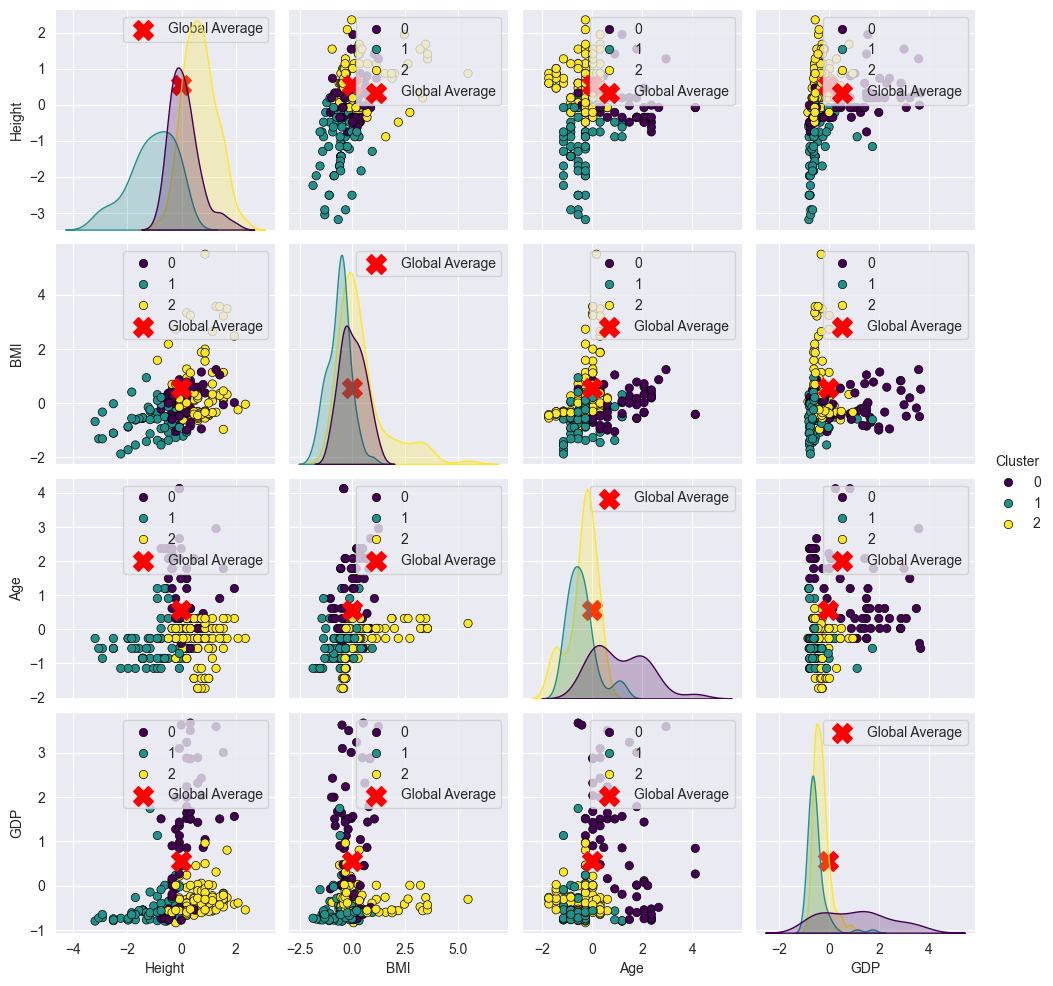

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new column to indicate if the point is the global average
bio_by_sport_male['Is_Global_Average'] = bio_by_sport_male['Event'] == 'Global average Male'

# Create a pairplot with hue based on the 'Cluster' column and highlight the global average
pairplot = sns.pairplot(bio_by_sport_male, 
                         hue='Cluster', 
                         vars=['Height', 'BMI', 'Age', 'GDP'], 
                         palette='viridis', 
                         plot_kws={'edgecolor': 'black'})

# Highlight the global average points
for ax in pairplot.axes.flatten():
    # Set the marker to X for global average points
    ax.scatter(bio_by_sport_male[bio_by_sport_male['Is_Global_Average']]['Height'], 
               bio_by_sport_male[bio_by_sport_male['Is_Global_Average']]['BMI'],
               color='red', s=200, label='Global Average', marker='X')
    ax.legend(loc='upper right')

# Show the plot
plt.show()


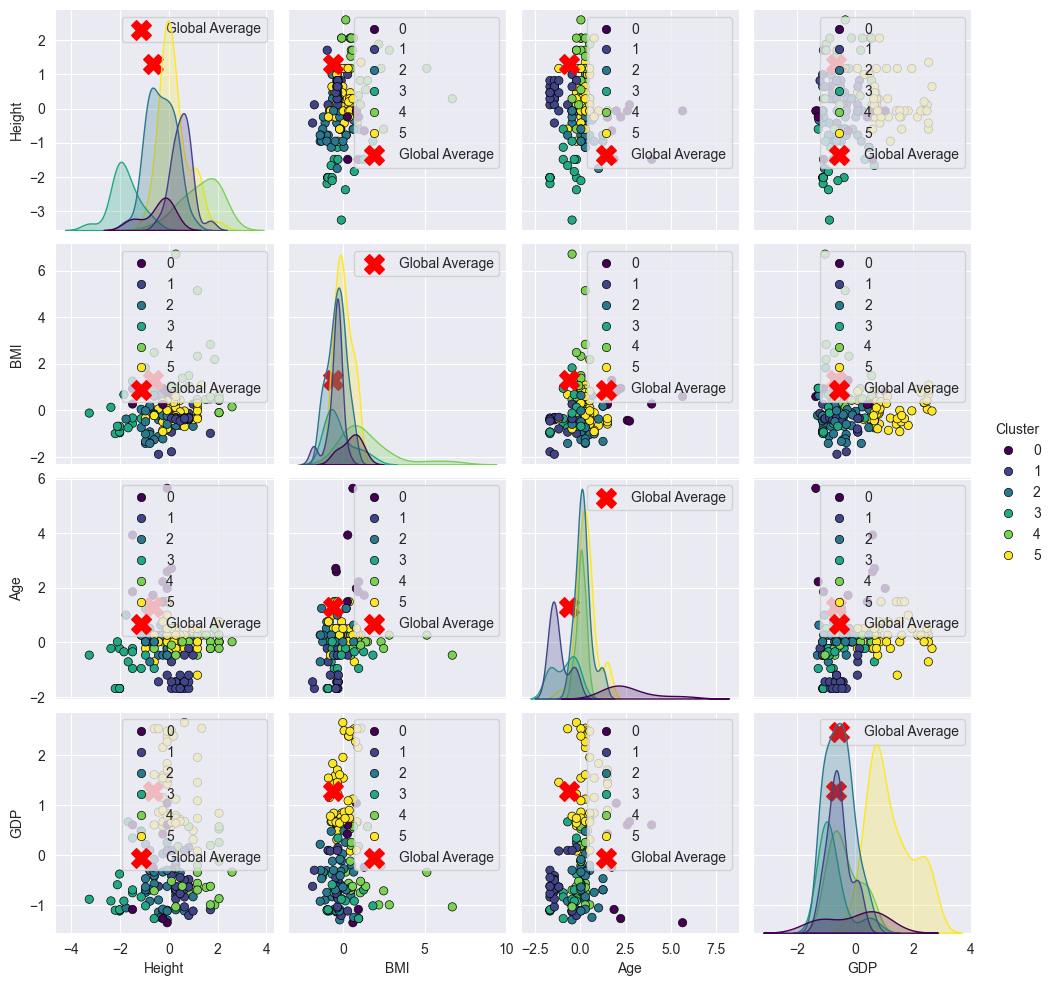

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new column to indicate if the point is the global average
bio_by_sport_female['Is_Global_Average'] = bio_by_sport_female['Event'] == 'Global average Female'

# Create a pairplot with hue based on the 'Cluster' column and highlight the global average
pairplot = sns.pairplot(bio_by_sport_female, 
                         hue='Cluster', 
                         vars=['Height', 'BMI', 'Age', 'GDP'], 
                         palette='viridis', 
                         plot_kws={'edgecolor': 'black'})

# Highlight the global average points
for ax in pairplot.axes.flatten():
    # Set the marker to X for global average points
    ax.scatter(bio_by_sport_female[bio_by_sport_female['Is_Global_Average']]['Height'], 
               bio_by_sport_female[bio_by_sport_female['Is_Global_Average']]['BMI'],
               color='red', s=200, label='Global Average', marker='X')
    ax.legend(loc='upper right')

# Show the plot
plt.show()


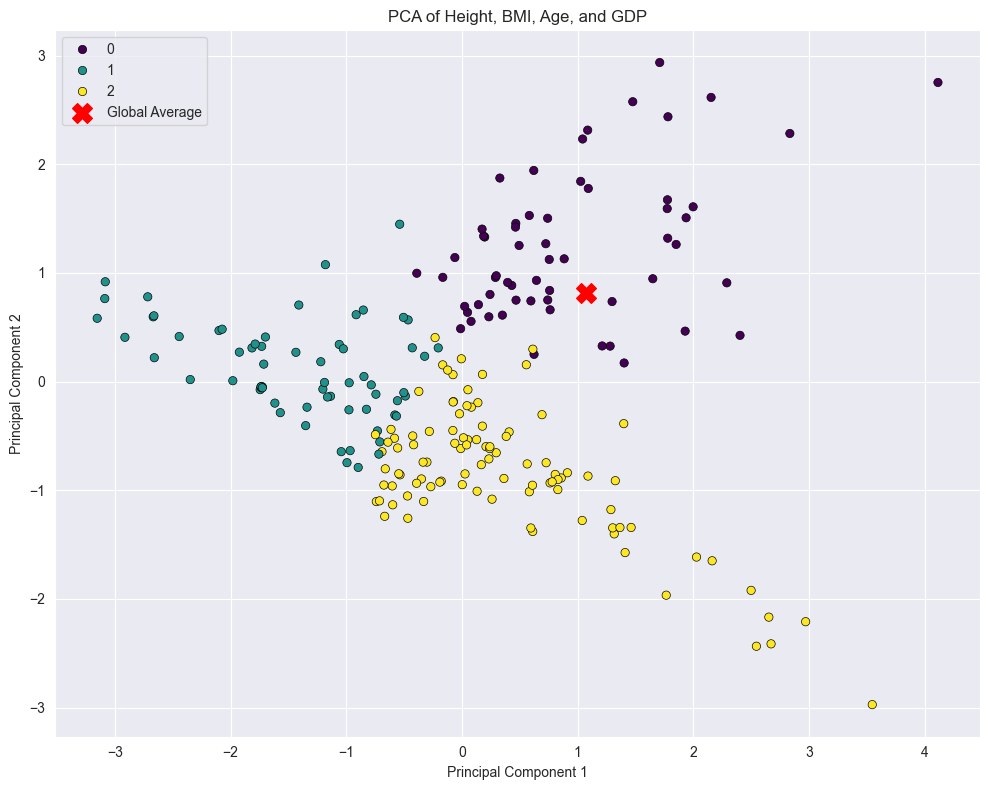

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select relevant features for PCA
features = ['Height', 'BMI', 'Age', 'GDP']

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(bio_by_sport_male[features])

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Create a new DataFrame with PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['Cluster'] = bio_by_sport_male['Cluster']
pca_df['Is_Global_Average'] = bio_by_sport_male['Is_Global_Average']

# Create a scatter plot of the PCA results
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='viridis', edgecolor='black')

# Highlight the global average point
global_avg_point = pca_df[pca_df['Is_Global_Average']]
plt.scatter(global_avg_point['PC1'], global_avg_point['PC2'], color='red', s=200, label='Global Average', marker='X')

# Set titles and labels
plt.title('PCA of Height, BMI, Age, and GDP')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

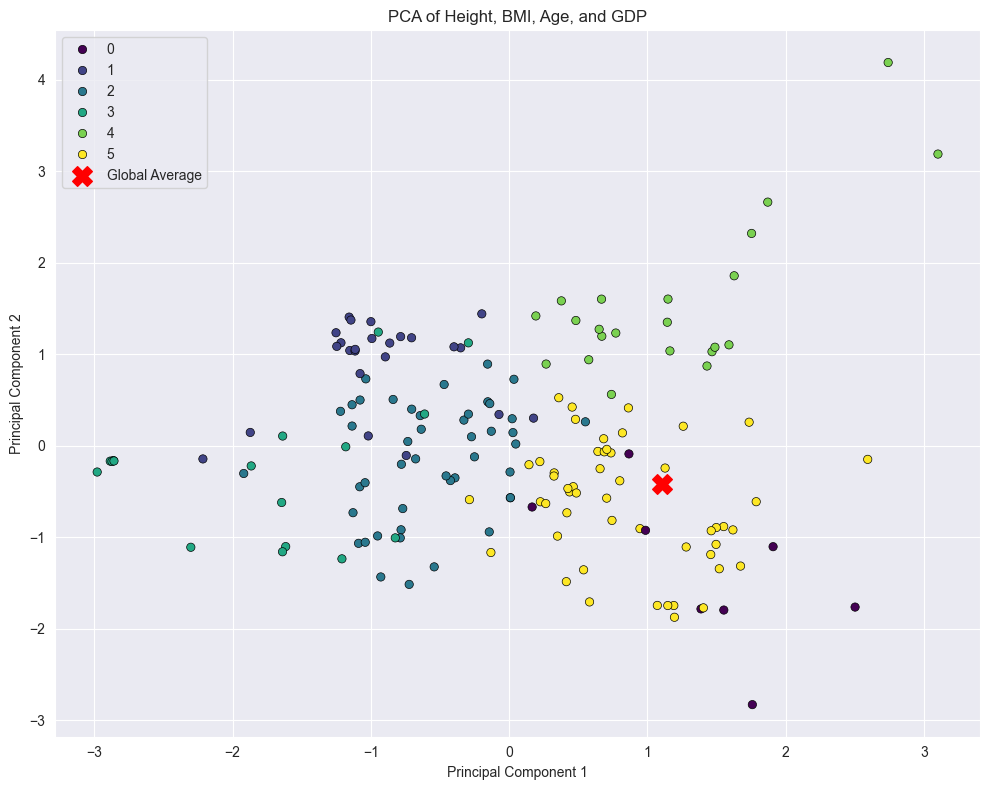

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select relevant features for PCA
features = ['Height', 'BMI', 'Age', 'GDP']

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(bio_by_sport_female[features])

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Create a new DataFrame with PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['Cluster'] = bio_by_sport_female['Cluster']
pca_df['Is_Global_Average'] = bio_by_sport_female['Is_Global_Average']

# Create a scatter plot of the PCA results
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='viridis', edgecolor='black')

# Highlight the global average point
global_avg_point = pca_df[pca_df['Is_Global_Average']]
plt.scatter(global_avg_point['PC1'], global_avg_point['PC2'], color='red', s=200, label='Global Average', marker='X')

# Set titles and labels
plt.title('PCA of Height, BMI, Age, and GDP')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

In [14]:
bio_by_sport_male.sort_values(by="Age")

,Event,Height,BMI,Age,GDP,Cluster,Is_Global_Average
161,"Swimming Men's 1,500 metres Freestyle",0.596355,-0.476553,-1.729399,-0.313988,2,False
167,Swimming Men's 200 metres Backstroke,0.866379,-0.547257,-1.729399,-0.264287,2,False
176,Swimming Men's 400 metres Individual Medley,0.596355,-0.450560,-1.729399,-0.283452,2,False
175,Swimming Men's 400 metres Freestyle,0.731367,-0.417578,-1.729399,-0.414080,2,False
166,Swimming Men's 100 metres Freestyle,0.866379,-0.316798,-1.436903,-0.545024,2,False
...,...,...,...,...,...,...,...
132,Sailing Mixed 5.5 metres,-0.011201,0.265407,2.365544,-0.779602,0,False
152,Shooting Men's Trap,-0.078707,0.866591,2.658040,-0.489823,0,False
130,Sailing Men's Two Person Keelboat,1.271416,1.239156,2.950536,3.585700,0,False
82,"Equestrianism Mixed Dressage, Team",-0.078707,-0.418138,4.120520,0.840972,0,False


In [15]:
bio_by_sport_female.sort_values(by="Age")

,Event,Height,BMI,Age,GDP,Cluster,Is_Global_Average
75,Gymnastics Women's Individual All-Around,-2.013794,-0.953115,-1.686825,-1.104738,3,False
136,Swimming Women's 400 metres Individual Medley,0.288134,-0.380640,-1.686825,-0.626973,1,False
135,Swimming Women's 400 metres Freestyle,0.465205,-0.415249,-1.686825,-0.771942,1,False
72,Gymnastics Women's Balance Beam,-2.013794,-0.938568,-1.686825,-1.104738,3,False
73,Gymnastics Women's Floor Exercise,-2.013794,-0.932858,-1.686825,-1.103035,3,False
...,...,...,...,...,...,...,...
111,"Shooting Mixed Small-Bore Rifle, Prone, 50 metres",-0.243080,0.947011,2.224989,-1.272149,0,False
58,"Equestrianism Mixed Dressage, Individual",-0.066009,-0.428589,2.591721,0.601673,0,False
59,"Equestrianism Mixed Dressage, Team",0.111063,-0.458833,2.713965,0.666774,0,False
101,Sailing Mixed Three Person Keelboat,-1.482580,0.273597,3.936407,0.601673,0,False
